광고데이터를 통한 데이터분석 실습

In [1]:
import pandas as pd

df = pd.read_excel('C:\\Users\\KIM EUNKI\\Practice\\Naver_report.xlsx', skiprows=[0]) #1행 삭제
df.head()


,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [100]:
df.isnull().sum()  #결측치 확인 - 열단위(.sum(axis = 1)은 행단위)

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

In [123]:
#'클릭수'(float; 소수)를 소수점 반올림 후 정수(int)로 변경하기

clk = df['클릭수'].round(0) #반올림 후 clk라는 변수로 지정
clk.astype(int) #clk를 정수로 변경
df['클릭수'] = clk.astype(int) #clk를 정수로 변경후 기존 칼럽과 대체

df.head() #잘 변경 됐음을 확인

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268489,630.593475,1175174
4,3. html,HTML,9626374,814,0.008452,1408.435349,1145903


In [129]:
#클릭률 : CTR = 클릭수/노출수*100   (칼럼끼리 연산 가능함)
#클릭수가 변경됐으니 기존 클릭률(%)데이터도 변경이 필요함

df['클릭률(%)']=df['클릭수']/df['노출수']*100
df.head() #4번데이터가 바뀐 것을 알 수 있음

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,630.593475,1175174
4,3. html,HTML,9626374,814,0.008456,1408.435349,1145903


In [139]:
#평균클릭비용이 칼럼명에 원단위로 명시돼있으니 반올림하여 일의 자리수로 변경
#cpc 변수 생성
cpc=round(df['평균클릭비용(VAT포함,원)'], 0)
#이것도 정수로 변경과 동시에 기존 칼럼 대체
df['평균클릭비용(VAT포함,원)'] = cpc.astype(int)
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,631,1175174
4,3. html,HTML,9626374,814,0.008456,1408,1145903


## 판다스 데이터 탐색기법

In [148]:
df.shape #데이터 크기

(1381, 7)

In [151]:
df.columns #칼럼명 변환

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [157]:
df['키워드'].value_counts() 
df['키워드'].sort_values(ascending=False) #내림차순 정렬

1168    후위표기법
1332    회사소개서
1028    회사분위기
1303      회계책
1283       회계
        ...  
25          -
3           -
288         -
1           -
0           -
Name: 키워드, Length: 1381, dtype: object

## 시각화 연습

In [15]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt #맷플롯립 호출

#한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)



In [19]:
type(df['노출수']) #시리즈 호출 이유

pandas.core.series.Series

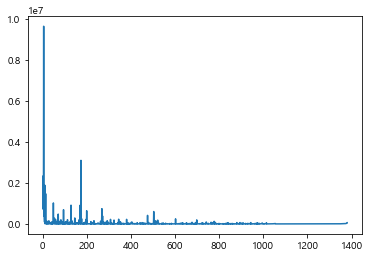

In [178]:
#plotting
df['노출수'].plot()
plt.show()

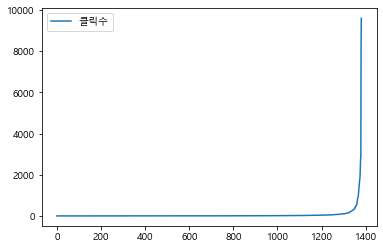

In [177]:
#클릭수 칼럼을 시각화: 이번에는 한줄로 코딩하여 완벽하게 실행해보자
#sort_values: 오름차순, reset_index: 인덱스 교체, drop('index', axis=1): 새로 생긴 'index'열을 삭제
(((df['클릭수'].sort_values()).reset_index()).drop('index', axis=1)).plot()
plt.show()

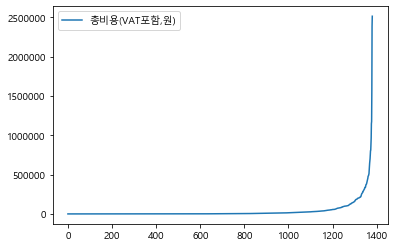

In [179]:
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index', axis=1)).plot()
plt.show()

## 중점관리 키워드 추출

In [22]:
imp = df['노출수']

In [23]:
#1. 95백분위수 (상위 5%)찾기 (quantile - 분위수 출력(기본값은 2사분위수(중앙값)))
#노출수의 상위 5%(기본 q=0.5)
imp.quantile(0.95) #0은 최소값, 100은 최대값

82858.0

In [24]:
#노출수의 중앙값, 최소값, 최대값
imp.median(), imp.min(), imp.max()

(3805.0, 1001, 9626374)

In [25]:
#2. 95백분위 이상 (상위 5%) 노출수 추출하기
#Series[condition]
imp = imp[imp>=imp.quantile(0.95)]
imp

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
698     196862
741      94933
763      82858
777     126393
780      90041
Name: 노출수, Length: 70, dtype: int64

In [26]:
#상위 5%에 해당하는 키워드는?
#데이터프레임의 기본숫자인덱스를 '키워드'로 재설정
#일단 원본을 보면
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [28]:
#데이터프레임의 인덱스를 키워드로 변경하기
#set_index('키워드')

df_index = df.set_index('키워드')
df_index

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.0,0.414149,261.549448,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.0,1.049915,295.974808,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.0,0.028475,4841.663580,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.6,0.268489,630.593475,1175174
HTML,3. html,9626374,813.6,0.008452,1408.435349,1145903
...,...,...,...,...,...,...
엑셀셀서식,올인원 패키지 : 업무자동화_3. 엑셀,24016,0.0,0.000000,0.000000,0
MATCH,올인원 패키지 : 업무자동화_3. 엑셀,32287,0.0,0.000000,0.000000,0
LTV,마케팅KPI수립,32602,0.0,0.000000,0.000000,0


In [41]:
#imp를 키워드 인덱스로 바뀐 노출수를 추출해보자
imp = df_index['노출수']
imp

키워드
-           2319456
-            767491
일러스트        1137840
-            694106
HTML        9626374
             ...   
엑셀셀서식         24016
MATCH         32287
LTV           32602
DECISION      60844
REST          61193
Name: 노출수, Length: 1381, dtype: int64

In [46]:
#상위 5% 키워드는?
imp[imp>=imp.quantile(0.95)]

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
부동산스터디     196862
가상메모리       94933
프로모션        82858
앱스토어       126393
OS          90041
Name: 노출수, Length: 70, dtype: int64

In [47]:
imp.index

Index(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       ...
       '가상머신', '부동산책', 'VD', '포토샵단축키', 'SUMIF', '엑셀셀서식', 'MATCH', 'LTV',
       'DECISION', 'REST'],
      dtype='object', name='키워드', length=1381)

# 광고그룹기준 데이터 분석

In [50]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [49]:
#groupby - 전달된 열을 기준으로 전체 데이터를 분류
grouped = df.groupby('광고그룹')
grouped

In [51]:
grouped.count() 

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [52]:
grouped.mean() 

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.145833,8.400000,0.183898,625.086295,7243.958333
001.BASIC DESIGN,5738.555556,6.800000,0.232924,298.693822,2427.333333
001.데이터분석/ 통계,3715.000000,20.280000,0.890571,1021.473357,19575.600000
002.R,13413.777778,8.533333,0.111199,360.038462,4796.000000
002.UX/UI,3090.800000,4.080000,0.089340,69.928571,550.000000
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.692308,16.707692,0.050832,648.327517,15781.615385
프로그래밍 유치원,5921.625000,7.800000,0.224738,2032.326389,23617.000000
프로그래밍 전체,90375.000000,9.200000,0.024037,123.881559,1626.166667


In [53]:
grouped.std() #표준편차

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,43495.109992,17.731616,0.314900,472.866258,15854.712974
001.BASIC DESIGN,4182.624120,9.138928,0.471768,176.145753,3220.042158
001.데이터분석/ 통계,4109.836709,18.316768,0.817334,269.588218,19127.395160
002.R,19333.628900,14.714619,0.165559,371.704042,10077.594033
002.UX/UI,1996.647866,7.179972,0.105666,69.105148,1005.282050
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,188247.583461,35.267418,0.060497,470.848706,37543.642006
프로그래밍 유치원,6642.341496,9.769925,0.251239,1649.704939,37088.923190
프로그래밍 전체,200385.152836,17.263730,0.034516,119.977104,2801.701328


In [54]:
grouped.var() #분산

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,1.891825e+09,314.410213,0.099162,2.236025e+05,2.513719e+08
001.BASIC DESIGN,1.749434e+07,83.520000,0.222565,3.102733e+04,1.036867e+07
001.데이터분석/ 통계,1.689076e+07,335.504000,0.668035,7.267781e+04,3.658572e+08
002.R,3.737892e+08,216.520000,0.027410,1.381639e+05,1.015579e+08
002.UX/UI,3.986603e+06,51.552000,0.011165,4.775522e+03,1.010592e+06
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,3.543715e+10,1243.790769,0.003660,2.216985e+05,1.409525e+09
프로그래밍 유치원,4.412070e+07,95.451429,0.063121,2.721526e+06,1.375588e+09
프로그래밍 전체,4.015421e+10,298.036364,0.001191,1.439451e+04,7.849530e+06
